In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("ETH-INR.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-11,19455.863281,20815.558594,19430.189453,20504.613281,20504.613281,54884332639
1,2017-11-12,20505.201172,20796.009766,19451.107422,20063.285156,20063.285156,105134352629
2,2017-11-13,20005.748047,21399.521484,20005.748047,20722.728516,20722.728516,68170861653
3,2017-11-14,20725.802734,22287.546875,20725.802734,22081.068359,22081.068359,69957072000
4,2017-11-15,22102.845703,22277.746094,21523.595703,21754.876953,21754.876953,47161182116


In [4]:
data.shape

(1681, 7)

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1.681000e+03
mean,80925.754477,83549.151720,77892.622111,80940.415922,80940.415922,9.391991e+11
std,93918.145902,96741.029680,90634.140485,93867.258176,93867.258176,8.288178e+11
min,6065.104004,6141.604980,5892.192871,6067.162109,6067.162109,4.041886e+10
25%,14672.567383,15061.937500,14328.908203,14684.626953,14684.626953,2.400246e+11
50%,29548.199219,30372.435547,28742.236328,29582.390625,29582.390625,7.362738e+11
75%,140772.171875,146068.875000,137184.953125,140780.750000,140780.750000,1.365311e+12
max,355554.500000,364228.468750,349691.875000,355703.531250,355703.531250,6.186122e+12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1681 non-null   object 
 1   Open       1681 non-null   float64
 2   High       1681 non-null   float64
 3   Low        1681 non-null   float64
 4   Close      1681 non-null   float64
 5   Adj Close  1681 non-null   float64
 6   Volume     1681 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 92.1+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


In [8]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2017-11-11,19455.863281,20815.558594,19430.189453,20504.613281,20504.613281,54884332639,2017,11,11
1,2017-11-12,20505.201172,20796.009766,19451.107422,20063.285156,20063.285156,105134352629,2017,11,12
2,2017-11-13,20005.748047,21399.521484,20005.748047,20722.728516,20722.728516,68170861653,2017,11,13
3,2017-11-14,20725.802734,22287.546875,20725.802734,22081.068359,22081.068359,69957072000,2017,11,14
4,2017-11-15,22102.845703,22277.746094,21523.595703,21754.876953,21754.876953,47161182116,2017,11,15


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1681 non-null   datetime64[ns]
 1   Open       1681 non-null   float64       
 2   High       1681 non-null   float64       
 3   Low        1681 non-null   float64       
 4   Close      1681 non-null   float64       
 5   Adj Close  1681 non-null   float64       
 6   Volume     1681 non-null   int64         
 7   Year       1681 non-null   int32         
 8   Month      1681 non-null   int32         
 9   Day        1681 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1)
memory usage: 111.8 KB


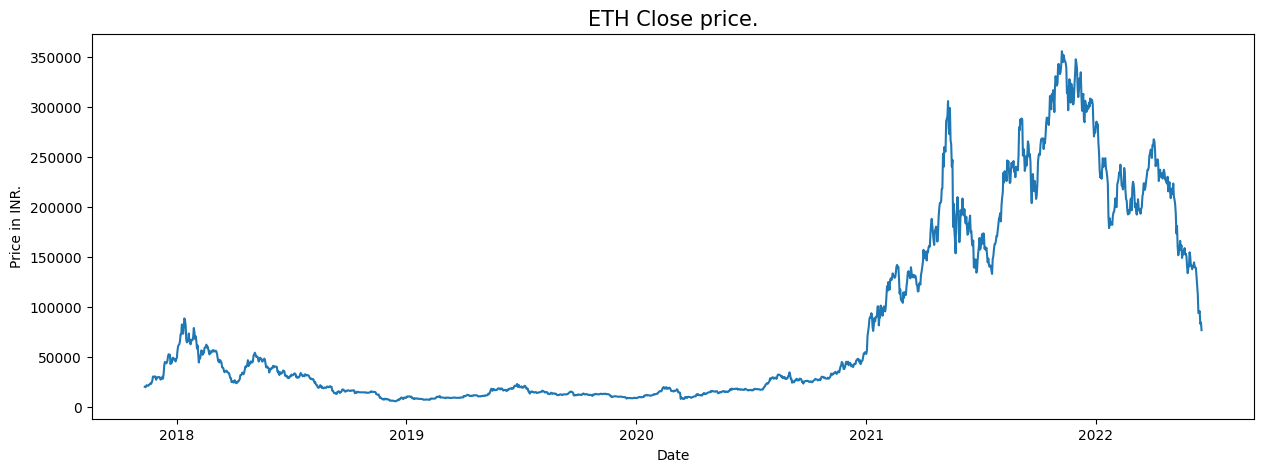

In [11]:
x=data['Date']
y=data['Close']

plt.figure(figsize=(15, 5))
plt.plot(x,y)
plt.title('ETH Close price.', fontsize=15)#ADJUSTED CLOSE
plt.ylabel('Price in INR.')

plt.xlabel('Date')
plt.show()

In [12]:
data[data['Close'] == data['Adj Close']].shape, data.shape

((1681, 10), (1681, 10))

In [13]:
data = data.drop(['Adj Close'], axis=1)

In [14]:
X = data[['Year', 'Month', 'Day', 'Open', 'High', 'Low']]
y = data['Close']
train_size = int(0.8 * len(data))
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [15]:
#standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [16]:
#creating n training mlp model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train_scaled)


C:\Users\PRATHEEK POOJARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [17]:
y_pred = mlp_regressor.predict(X_test_scaled)
y_pred_train=mlp_regressor.predict(X_train_scaled)

In [18]:
mse = mean_squared_error(y_test_scaled, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.02259130120671106


In [19]:
r2=r2_score(y_test_scaled,y_pred)
print('R-squared',r2)

R-squared 0.9824695727023989


In [20]:
r3=r2_score(y_train_scaled,y_pred_train)
print('R-squared',r3)

R-squared 0.9976858829083673


In [21]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_regressor.fit(X_train_scaled, y_train)

C:\Users\PRATHEEK POOJARY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [22]:
y_pred = mlp_regressor.predict(X_test_scaled)


In [23]:
y_pred_train = mlp_regressor.predict(X_train_scaled)

# TEST DATA

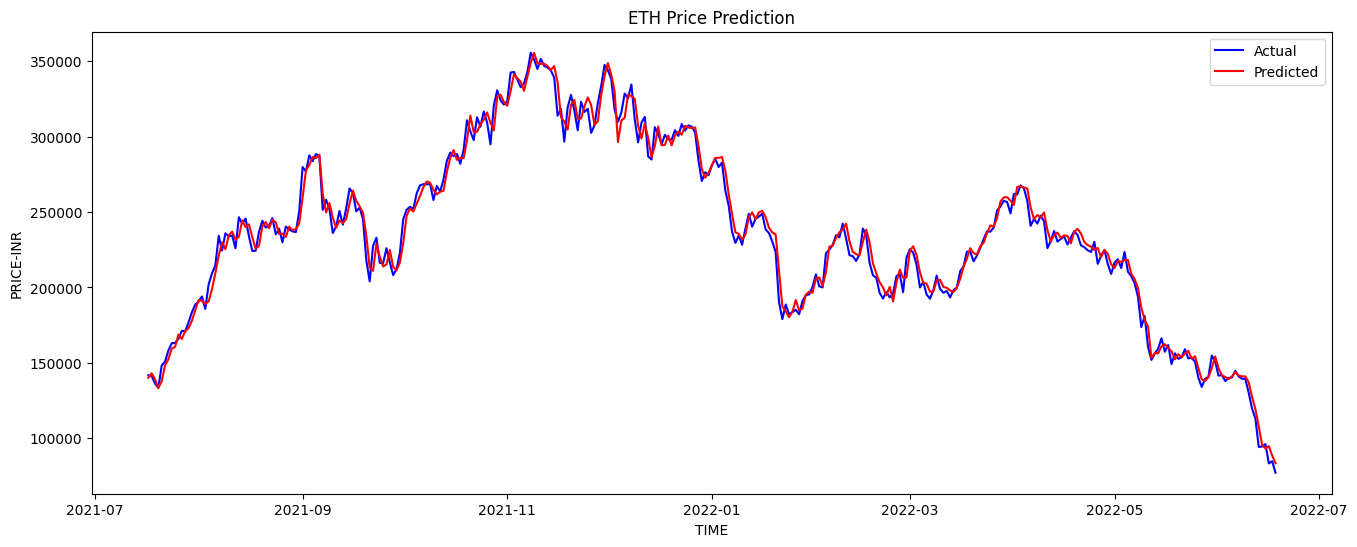

In [24]:
plt.figure(figsize=(16,6))
plt.plot(data["Date"][len(y_train):],y_test.values, label='Actual',color='blue')
plt.plot(data["Date"][len(y_train):],y_pred, label='Predicted',color='red')
plt.xlabel('TIME')
plt.ylabel('PRICE-INR')
plt.title('ETH Price Prediction')
plt.legend()
#plt.grid()
plt.show()


# TRAIN DATA

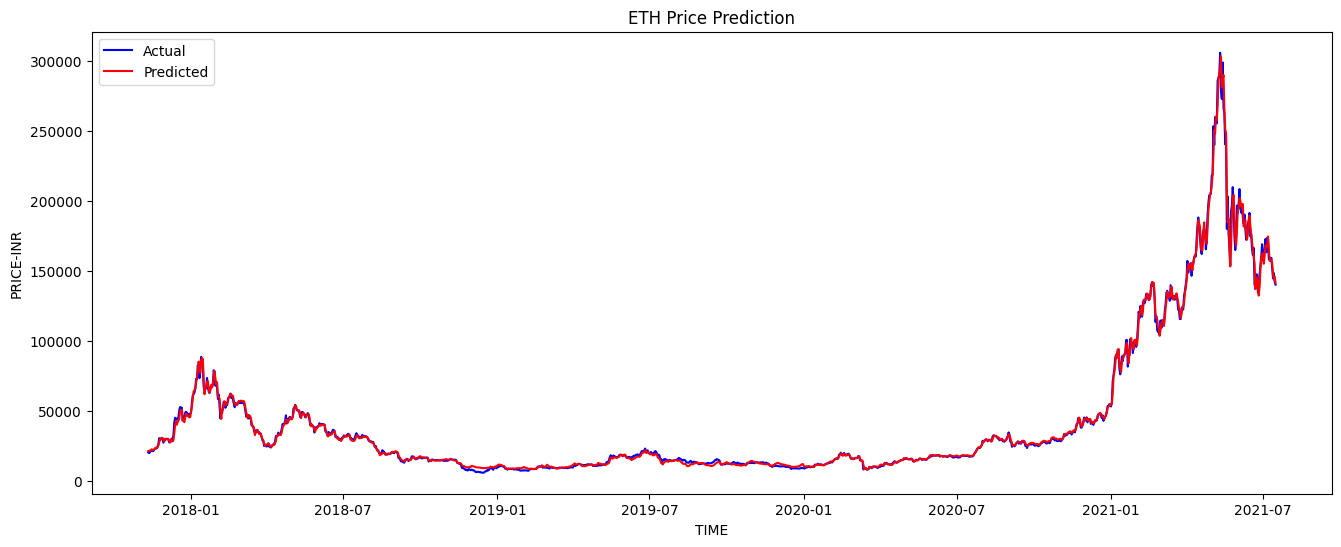

In [25]:
plt.figure(figsize=(16,6))
plt.plot(data["Date"][:len(y_train)],y_train.values, label='Actual',color='blue')
plt.plot(data["Date"][:len(y_train)],y_pred_train, label='Predicted',color='red')
plt.xlabel('TIME')
plt.ylabel('PRICE-INR')
plt.title('ETH Price Prediction')
plt.legend()
#plt.grid()
plt.show()

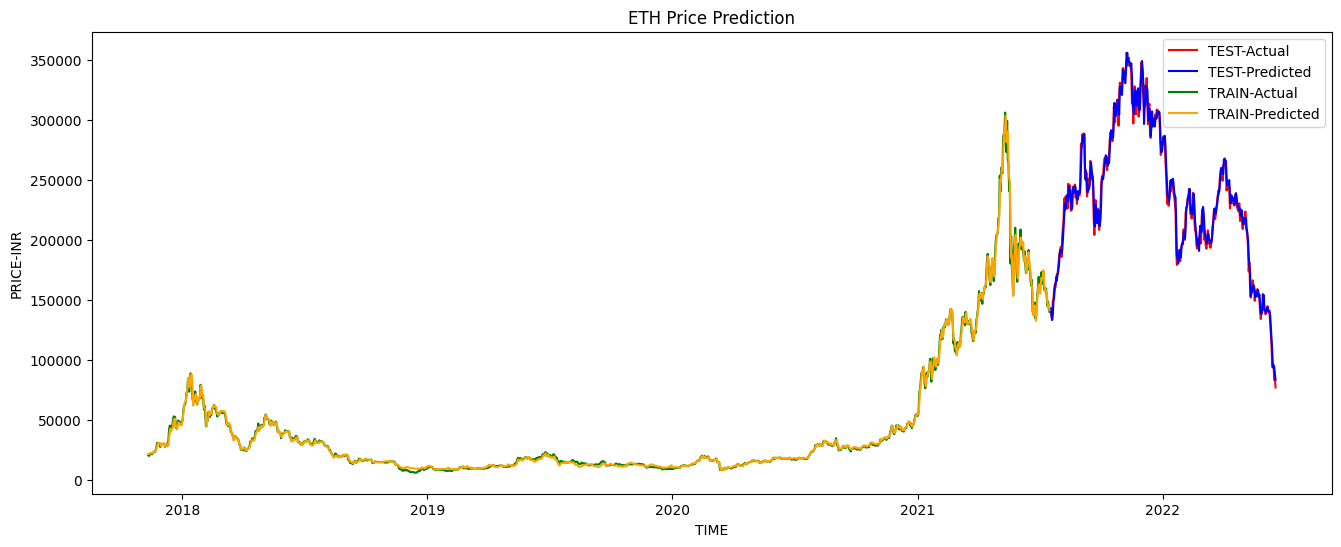

In [26]:
plt.figure(figsize=(16,6))
plt.plot(data["Date"][len(y_train):],y_test.values, label='TEST-Actual',color='red')
plt.plot(data["Date"][len(y_train):],y_pred, label='TEST-Predicted',color='blue')
plt.plot(data["Date"][:len(y_train)],y_train.values, label='TRAIN-Actual',color='green')
plt.plot(data["Date"][:len(y_train)],y_pred_train, label='TRAIN-Predicted',color='orange')
plt.xlabel('TIME')
plt.ylabel('PRICE-INR')
plt.title('ETH Price Prediction')
plt.legend()
#plt.grid()
plt.show()